Load the dataset and explore the variables. 

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/jw156/Ironhack/Day15/Morning/data_3.09_activities/files_for_activities/csv_files/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [5]:
Y = data['Churn']

In [6]:
data.drop('Churn', axis=1, inplace=True)

In [7]:
Y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Extract the independent variables and scale them.

In [8]:
X = data[['tenure','SeniorCitizen','MonthlyCharges']]
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [9]:
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

In [10]:
Y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Build the logistic regression model

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, Y, test_size=0.4, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
logistic_classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_train, y_train)
                        

In [13]:
from sklearn.metrics import cohen_kappa_score


In [14]:
print("The accuracy of the model is: ",round(logistic_classification.score(X_test, y_test),2))
print("The kappa of the model is: ",round(cohen_kappa_score(Y,logistic_classification.predict(scaled_x)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.41


In [15]:
predictions = logistic_classification.predict(X_test)
logistic_classification.score(X_test, y_test)

0.7916962384669979

In [16]:
Y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Evaluate the model

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, predictions)

array([[1880,  191],
       [ 396,  351]], dtype=int64)

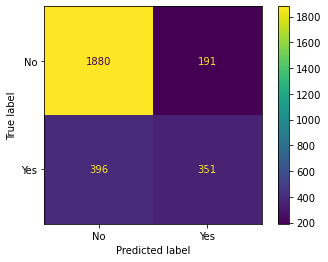

In [18]:
plot_confusion_matrix(logistic_classification, X_test, y_test)

### Even a simple model will give us more than 70% accuracy. Why?

Accuracy may seem good however we have a low kapper, the dataset remains inbalanced

## Downsampling

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [20]:
rus = RandomUnderSampler()

X = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
X_rus, y_rus = rus.fit_sample(X_scaled, Y)

In [21]:
pd.DataFrame(y_rus).value_counts()

Churn
Yes      1869
No       1869
dtype: int64

In [22]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_rus, y_rus)

print("The accuracy of the model is: ",round(classification.score(X_rus, y_rus),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_rus,classification.predict(X_rus)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.47


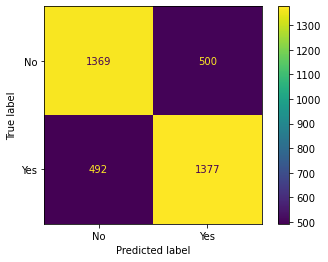

In [23]:
plot_confusion_matrix(classification, X_rus, y_rus)

## Upsampling

In [24]:
ros = RandomOverSampler()
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)

In [25]:
X_ros, y_ros = ros.fit_sample(X_scaled, Y)

In [26]:
pd.DataFrame(y_ros).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [27]:
upsampling_classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_ros, y_ros)

print("The accuracy of the model is: ",round(upsampling_classification.score(X_ros, y_ros),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_ros,upsampling_classification.predict(X_ros)),2))

The accuracy of the model is:  0.74
The kappa of the model is:  0.47


In [28]:
predictions = upsampling_classification.predict(X_ros)
upsampling_classification.score(X_rus, y_rus)

0.7346174424826111

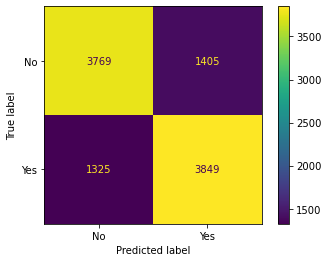

In [29]:
plot_confusion_matrix(upsampling_classification, X_ros, y_ros)

# Synthetic Minority Oversampling Technique (SMOTE) 

Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE()
X = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
X_sm, y_sm = smote.fit_sample(X_scaled, Y)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [32]:
smote_classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

print("The accuracy of the model is: ",round(smote_classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,smote_classification.predict(X_sm)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.47


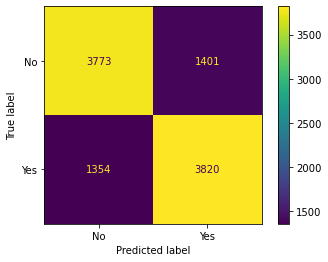

In [33]:
plot_confusion_matrix(smote_classification, X_sm, y_sm)

## UnderSampling using TomekLinks 

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [34]:
from imblearn.under_sampling import TomekLinks


In [35]:
tl = TomekLinks('majority')
X = data[['tenure', 'SeniorCitizen','MonthlyCharges']]


In [36]:
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)

In [37]:
X_tl, y_tl = tl.fit_sample(X_scaled, Y)
pd.DataFrame(y_tl).value_counts()

Churn
No       4694
Yes      1869
dtype: int64

In [38]:
tomek_classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)

In [39]:
print("The accuracy of the model is: ",round(tomek_classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,tomek_classification.predict(X_tl)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.45


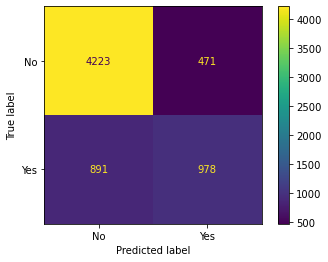

In [40]:
plot_confusion_matrix(tomek_classification, X_tl, y_tl)